# 회귀분석_최적회귀_정규화_tree회귀

## 보스턴 집값 데이터 회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")

In [3]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: >

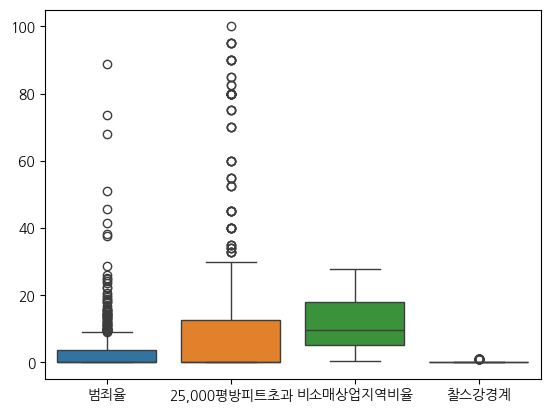

In [7]:
sns.boxplot(data[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계']])

<Axes: >

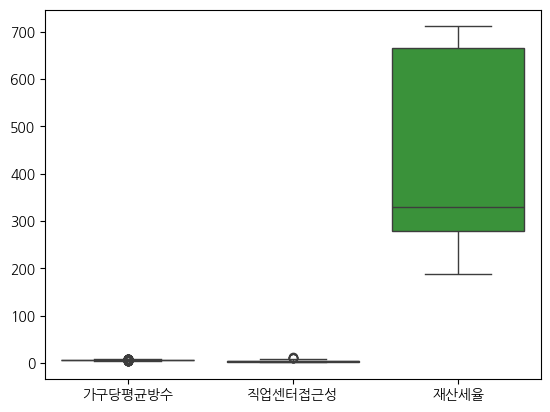

In [12]:
sns.boxplot(data[['가구당평균방수', '직업센터접근성', '재산세율']])

<Axes: >

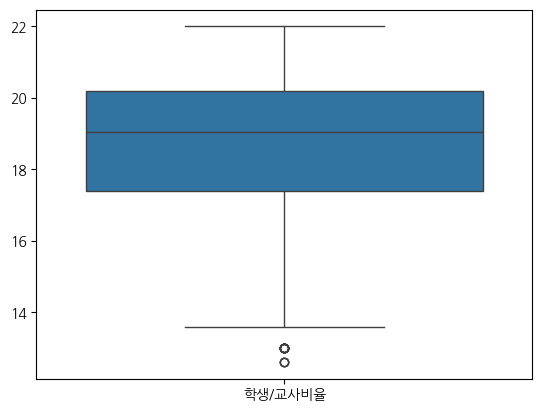

In [14]:
sns.boxplot(data[['학생/교사비율']])

<Axes: >

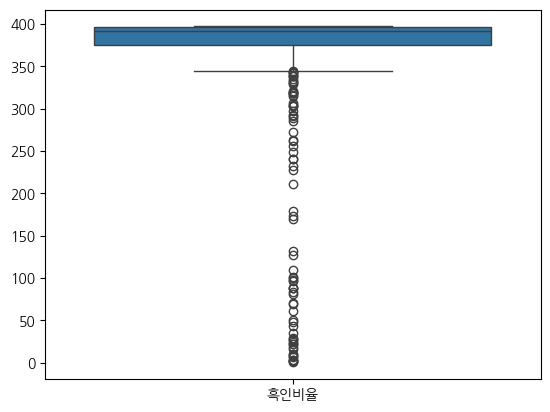

In [16]:
sns.boxplot(data[['흑인비율']])

<Axes: >

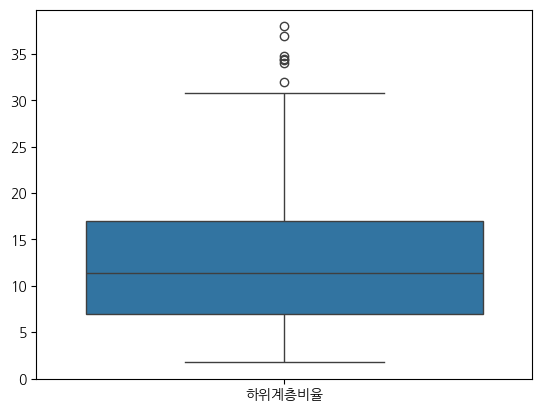

In [17]:
sns.boxplot(data[['하위계층비율']])

<Axes: >

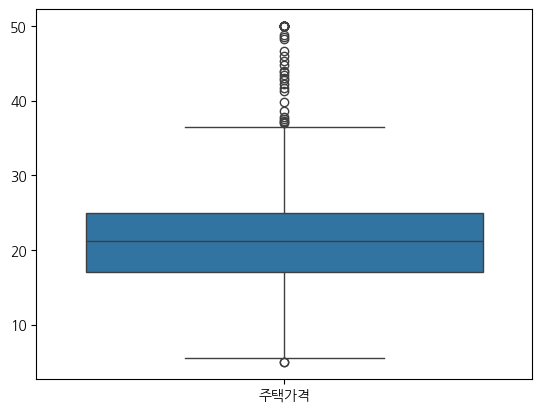

In [18]:
sns.boxplot(data[['주택가격']])

In [19]:
data.corr(method='spearman')

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
"25,000평방피트초과",-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
비소매상업지역비율,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
찰스강경계,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
농축 일산화질소,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
가구당평균방수,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
1940년이전건축비율,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
직업센터접근성,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
도로접근성,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
재산세율,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


<Axes: >

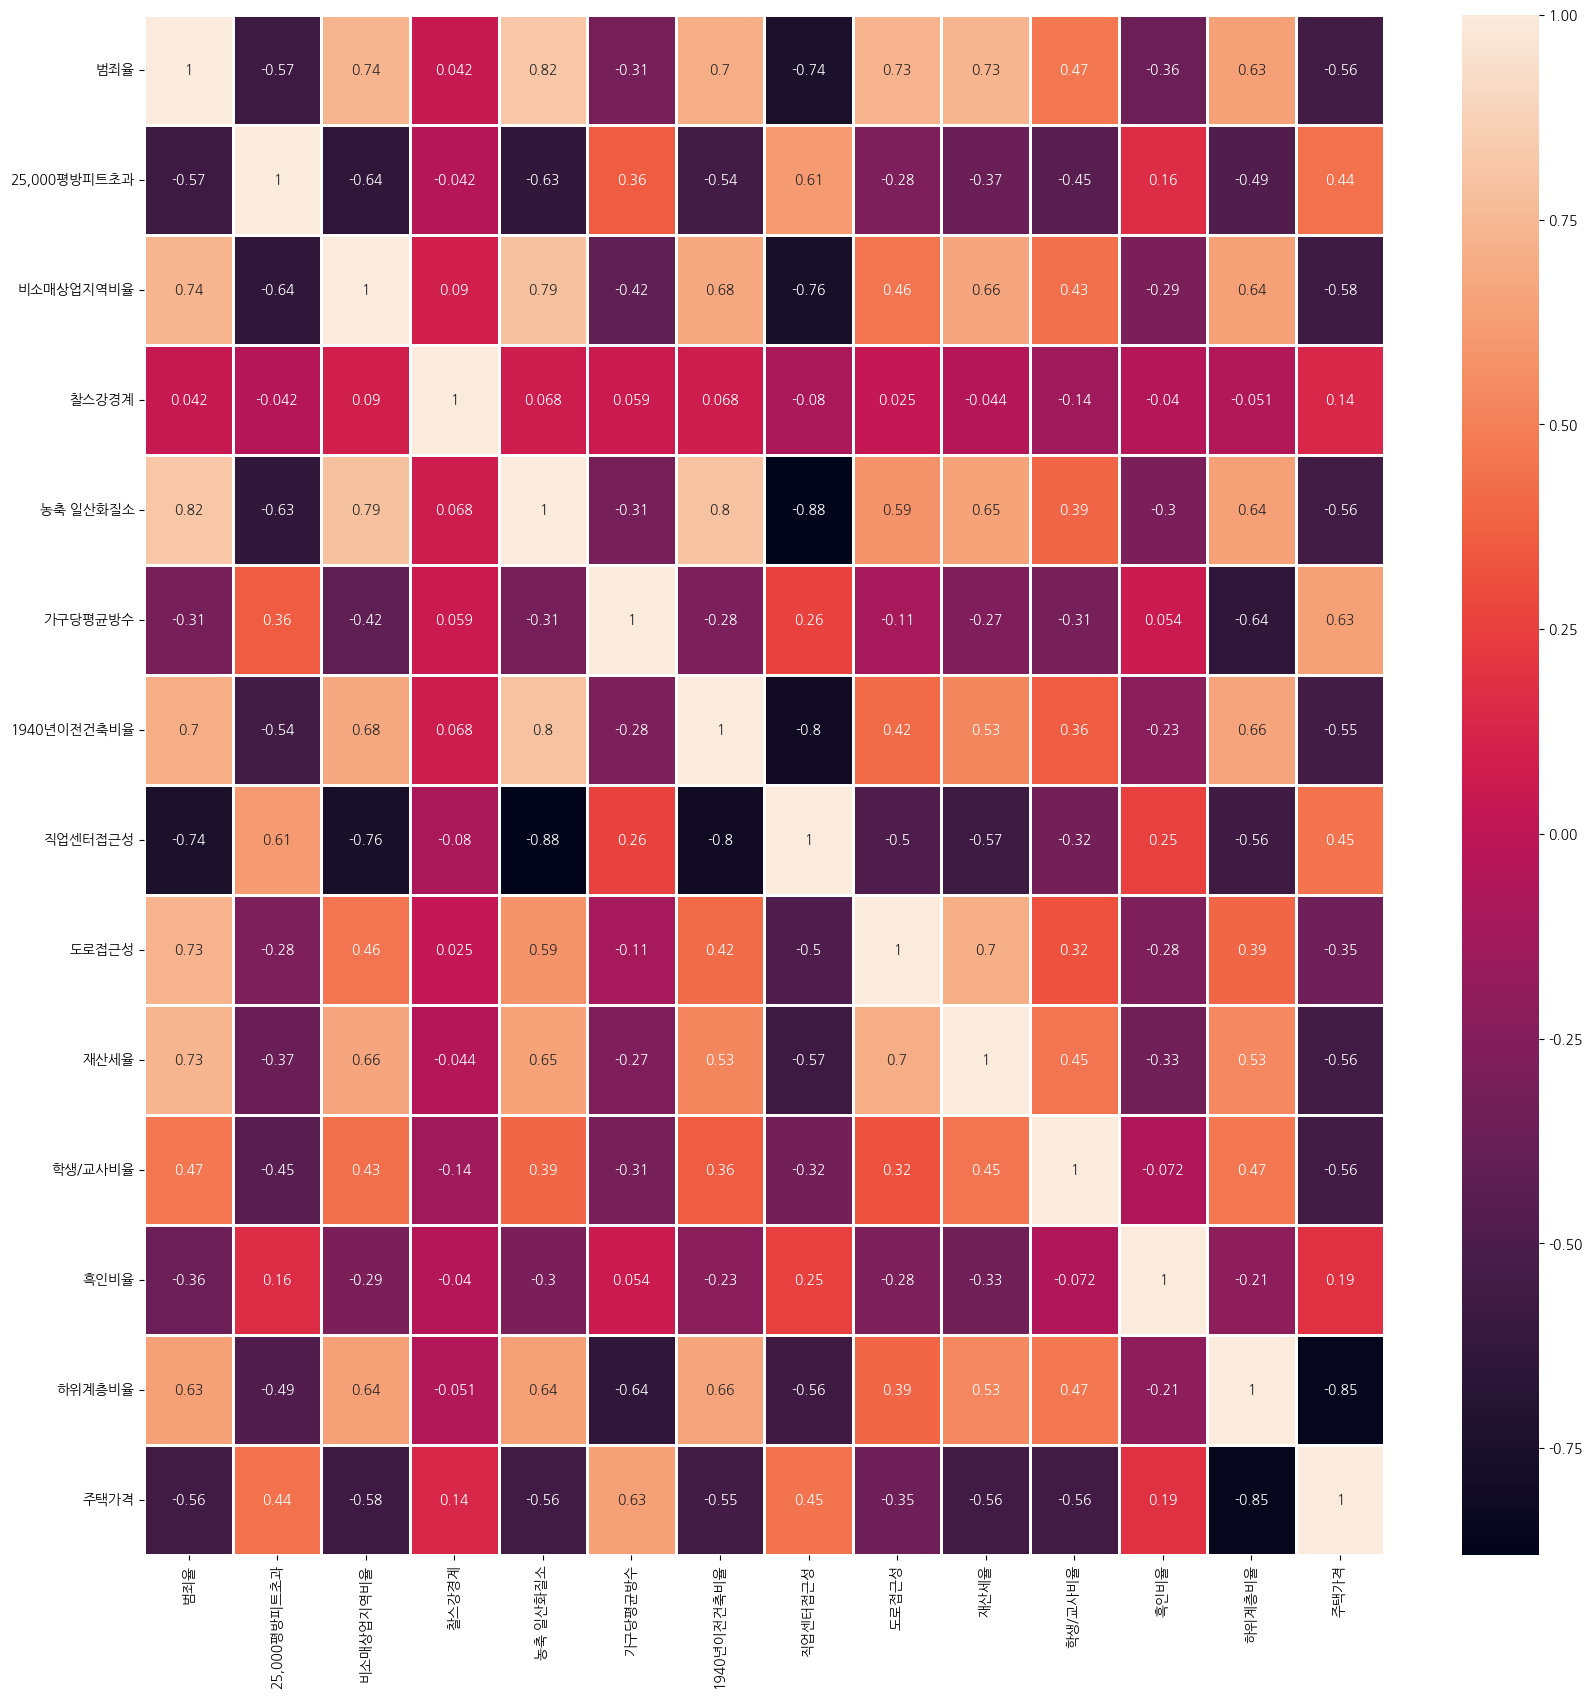

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(method='spearman'), annot=True, linewidth=1)

In [24]:
X = data.drop('주택가격', axis=1)
y = data['주택가격']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

스케일 맞추기

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
rs = RobustScaler()
rs.fit(X_train)
rs_X_train = rs.transform(X_train)
rs_X_test = rs.transform(X_test)
rs_X_train = pd.DataFrame(rs_X_train, columns=X_train.columns, index=X_train.index)
rs_X_test = pd.DataFrame(rs_X_test, columns=X_test.columns, index=X_test.index)

In [30]:
rs_X_train

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
5,-0.070845,0.0,-0.579029,0.0,-0.441989,0.255601,-0.393045,0.888157,-0.10,-0.279070,0.028169,0.129964,-0.610414
116,-0.039048,0.0,0.024672,0.0,0.049724,-0.065005,-0.102213,-0.113375,0.05,0.263566,-0.225352,0.087674,0.119092
45,-0.026596,0.0,-0.214341,0.0,-0.497238,-0.688545,-0.917808,0.599068,-0.10,-0.250646,-0.197183,0.273337,-0.076368
16,0.249243,0.0,-0.119507,0.0,0.000000,-0.369202,-1.012645,0.418185,-0.05,-0.059432,0.676056,-0.244972,-0.464085
468,4.788193,0.0,0.648419,0.0,0.232044,-0.380562,-0.133825,-0.059784,0.95,0.868217,0.450704,-1.178958,0.769559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.026665,0.0,-0.087124,0.0,-0.099448,-0.494162,0.306639,-0.269402,0.00,0.139535,0.647887,0.209902,0.826168
270,0.013331,1.0,-0.210486,0.0,-0.408840,-0.468918,-0.742887,0.397265,-0.10,-0.276486,0.000000,-0.152140,0.221629
348,-0.075484,4.0,-0.592136,0.0,-0.569061,0.514358,-1.004215,1.574001,-0.05,-0.129199,-0.450704,-0.034038,-0.527103
435,3.408139,0.0,0.648419,0.0,1.116022,0.506784,0.363541,-0.295341,0.95,0.868217,0.450704,-14.530686,1.318558


In [31]:
rs_X_test

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
173,-0.051488,0.0,-0.434850,0.0,-0.154696,0.237930,0.142255,-0.138563,0.00,-0.087855,-0.563380,0.201135,-0.201335
274,-0.062534,2.0,-0.252891,1.0,-0.502762,0.669612,-0.936776,0.291644,-0.05,-0.196382,-0.281690,0.273337,-0.789853
491,-0.047125,0.0,1.391673,0.0,0.392265,-0.308615,0.452055,-0.372468,-0.05,0.984496,0.422535,-0.076844,0.763151
72,-0.051532,0.0,0.086353,0.0,-0.690608,-0.205112,-1.465753,0.655245,-0.05,-0.064599,0.169014,-0.035585,-0.577303
452,1.510817,0.0,0.648419,0.0,0.966851,0.087725,0.304531,-0.222152,0.95,0.868217,0.450704,-0.335740,0.677704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2.959232,0.0,0.648419,0.0,1.116022,0.225308,0.418335,-0.313255,0.95,0.868217,0.450704,-0.290872,0.918024
23,0.228770,0.0,-0.119507,0.0,0.000000,-0.523193,0.477345,0.296934,-0.05,-0.059432,0.676056,0.151625,0.956475
225,0.084523,0.0,-0.269082,0.0,-0.187845,3.152414,0.119073,-0.063992,0.15,-0.059432,-0.338028,-0.495101,-0.672363
433,1.664254,0.0,0.648419,0.0,0.966851,0.263175,0.222339,-0.237902,0.95,0.868217,0.450704,-15.028881,0.565554


# 선형회귀분석

In [32]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# 상수항 추가
rs_X_train_const = sm.add_constant(rs_X_train)
rs_X_test_const = sm.add_constant(rs_X_test)

In [34]:
rs_X_train_const.head(2)

,const,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
5,1.0,-0.070845,0.0,-0.579029,0.0,-0.441989,0.255601,-0.393045,0.888157,-0.10,-0.279070,0.028169,0.129964,-0.610414
116,1.0,-0.039048,0.0,0.024672,0.0,0.049724,-0.065005,-0.102213,-0.113375,0.05,0.263566,-0.225352,0.087674,0.119092


In [45]:
ols = sm.OLS(y_train, rs_X_train_const).fit()
pred = ols.predict(rs_X_test_const)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

MAE:  3.1627098714574124
MSE:  21.517444231177294
RMSE:  4.63868992617283
R2:  0.711226005748492


In [36]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.96e-92
Time:                        14:33:23   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.9494      0.408     58.755   

In [38]:
result = pd.DataFrame(dict(y_test=y_test, pred=pred))
result

,y_test,pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
...,...,...
441,17.1,17.403672
23,14.5,13.385941
225,50.0,39.983425
433,14.3,16.682863


In [44]:
result['잔차'] = result['y_test'] - result['pred']
result['잔차제곱'] = result['잔차'] ** 2
result['MSE'] = result['잔차제곱'].mean()
result['RMSE'] = result['MSE'].apply(np.sqrt)
result

,y_test,pred,잔차,잔차제곱,MSE,RMSE
173,23.6,28.648960,-5.048960,25.491998,21.517444,4.63869
274,32.4,36.495014,-4.095014,16.769138,21.517444,4.63869
491,13.6,15.411193,-1.811193,3.280421,21.517444,4.63869
72,22.8,25.403213,-2.603213,6.776718,21.517444,4.63869
452,16.1,18.855280,-2.755280,7.591567,21.517444,4.63869
...,...,...,...,...,...,...
441,17.1,17.403672,-0.303672,0.092216,21.517444,4.63869
23,14.5,13.385941,1.114059,1.241127,21.517444,4.63869
225,50.0,39.983425,10.016575,100.331779,21.517444,4.63869
433,14.3,16.682863,-2.382863,5.678036,21.517444,4.63869


# 최적회귀 구하기(단계적 변수 선택법)
* 1) 전진선택법
* 2) 후진제거법

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression() 

* 전진선택법으로 분석

In [50]:
sfs_fw = SequentialFeatureSelector(
        estimator=model,
        direction='forward',
        scoring='r2',
        cv=5,
        n_jobs=4
        )
sfs_fw.fit(rs_X_train_const, y_train)
# print(sfs_fw.get_support())
selected_cols = rs_X_train_const.columns[sfs_fw.get_support()]
print("전진선택법으로 선택된 컬럼: ", list(selected_cols))

전진선택법으로 선택된 컬럼:  ['범죄율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '하위계층비율']


In [53]:
print("원래 컬럼수: ",len(rs_X_train_const.columns))
print("selected_cols: ", len(selected_cols))

원래 컬럼수:  14
selected_cols:  7


In [56]:
selected_cols

Index(['범죄율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '하위계층비율'], dtype='object')

In [57]:
fw_X_train = rs_X_train_const[['const', '범죄율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '하위계층비율']]
fw_X_test = rs_X_test_const[['const', '범죄율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '하위계층비율']]

In [58]:
ols2 = sm.OLS(y_train, fw_X_train).fit()
pred = ols2.predict(fw_X_test)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

MAE:  3.310296758822151
MSE:  23.36154939077495
RMSE:  4.833378672396251
R2:  0.6864772666772769


In [59]:
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     130.6
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.33e-93
Time:                        15:10:23   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2148.
Df Residuals:                     346   BIC:                             2179.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2035      0.370     65.339      0.0

## 후진제거법

In [60]:
sfs_bw = SequentialFeatureSelector(
        estimator=model,
        direction='backward',
        scoring='r2',
        cv=5,
        n_jobs=4
        )
sfs_bw.fit(rs_X_train_const, y_train)
# print(sfs_fw.get_support())
selected_cols = rs_X_train_const.columns[sfs_bw.get_support()]
print("전진선택법으로 선택된 컬럼: ", list(selected_cols))
print("원래 컬럼수: ",len(rs_X_train_const.columns))
print("selected_cols: ", len(selected_cols))

전진선택법으로 선택된 컬럼:  ['범죄율', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '도로접근성', '학생/교사비율', '하위계층비율']
원래 컬럼수:  14
selected_cols:  7


In [61]:
bw_X_train = rs_X_train_const[['const', '범죄율', '농축 일산화질소', '가구당평균방수', '도로접근성', '직업센터접근성', '학생/교사비율', '하위계층비율']]
bw_X_test = rs_X_test_const[['const', '범죄율', '농축 일산화질소', '가구당평균방수', '도로접근성', '직업센터접근성', '학생/교사비율', '하위계층비율']]

In [62]:
ols3 = sm.OLS(y_train, bw_X_train).fit()
pred = ols3.predict(bw_X_test)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

MAE:  3.3466334214986695
MSE:  22.707104989677806
RMSE:  4.765197266606893
R2:  0.6952602114215478


In [63]:
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     126.4
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.37e-91
Time:                        15:20:26   Log-Likelihood:                -1069.9
No. Observations:                 354   AIC:                             2156.
Df Residuals:                     346   BIC:                             2187.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2492      0.384     63.158      0.0

# 정규화를 통한 선형회귀 변수 선택법
## 1) Lasso 회귀(L1규제)
* 가중치의 절대값의 합을 최소화
* 일부 가중치를 0으로 만들어서 변수를 무력화
* 변수를 선택하는 효과
* 불필요한 변수 제거

## 2) Ridge 회귀(L2규제)
* 가중치의 제곱합을 최소화
* 계수를 0에 가깝게 만들지만 제거는 하지 않음
* 다중공선성 해결에 효과적

## 3) Elastic Net(혼합 규제, L1 + L2)
* L1규제와 L2규제를 결합한 모델
* Lasso와 Ridge의 장점을 모두 활용
* 변수 간 상관관계가 높을 때 효과적

# 정규화 회귀를 사용하는 이유: 과적합 방지, 범용성 향상

# 라쏘(Lasso, L1 제약, 절대값, 변수제외)

In [64]:
from sklearn.linear_model import Lasso

In [66]:
# rs_X_train

In [68]:
lasso = Lasso(alpha=1.0)
lasso.fit(rs_X_train, y_train)
pred = lasso.predict(rs_X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.333223
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.577229
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  3.9077374074166245
MSE:  28.65439334808176
RMSE:  5.35297985687241
R2:  0.6154448673792763


alpha 값을 변경하면서 비교

In [70]:
for i in range(1, 10):
    lasso = Lasso(alpha=i)
    lasso.fit(rs_X_train, y_train)
    pred = lasso.predict(rs_X_test)
    lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
    print("=" * 20, f"alpha={i}", "=" * 20)
    display(lasso_result)
    print("MAE: ", mean_absolute_error(y_test, pred))
    print("MSE: ", mean_squared_error(y_test, pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2: ", r2_score(y_test, pred))

==================== alpha=1 ====================


,0
범죄율,-0.333223
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.577229
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  3.9077374074166245
MSE:  28.65439334808176
RMSE:  5.35297985687241
R2:  0.6154448673792763
==================== alpha=2 ====================


,0
범죄율,-0.414809
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.204754
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.212059698467132
MSE:  33.47707681614788
RMSE:  5.785937851044364
R2:  0.5507222380036978
==================== alpha=3 ====================


,0
범죄율,-0.464670
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,2.723719
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.59198504132359
MSE:  40.48718716053475
RMSE:  6.362954279305702
R2:  0.4566433342759362
==================== alpha=4 ====================


,0
범죄율,-0.457179
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,1.866634
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.097964455293584
MSE:  48.92403004156567
RMSE:  6.994571469473
R2:  0.343417023964528
==================== alpha=5 ====================


,0
범죄율,-0.400917
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.690210
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.610496621412411
MSE:  58.102078904674975
RMSE:  7.622471968113427
R2:  0.2202433886033468
==================== alpha=6 ====================


,0
범죄율,-0.312229
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.961446000746035
MSE:  65.17638641213661
RMSE:  8.073189358124619
R2:  0.12530292943240406
==================== alpha=7 ====================


,0
범죄율,-0.177507
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  6.048084055264632
MSE:  67.07453231192318
RMSE:  8.189904291987983
R2:  0.09982893878256283
==================== alpha=8 ====================


,0
범죄율,-0.042785
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  6.151545715404532
MSE:  69.42407034408917
RMSE:  8.332110797636405
R2:  0.0682970581881509
==================== alpha=9 ====================


,0
범죄율,-0.000000
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  6.2324692707016665
MSE:  70.92756046126868
RMSE:  8.421850180409805
R2:  0.04811952958433485


# 릿지(Ridge, L2제약, 제곱합, 변수를 0에 가깝게 만들어 무력화)

In [71]:
from sklearn.linear_model import Ridge

In [72]:
ridge = Ridge(alpha=1.0)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.415266
"25,000평방피트초과",0.665007
비소매상업지역비율,0.461989
찰스강경계,3.070278
농축 일산화질소,-2.635082
가구당평균방수,3.253306
1940년이전건축비율,-0.522602
직업센터접근성,-4.460516
도로접근성,4.095406
재산세율,-2.635815


MAE:  3.1696298062803243
MSE:  21.712741346480254
RMSE:  4.659693267424397
R2:  0.7086050286730586


In [75]:
ridge = Ridge(alpha=100)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.413096
"25,000평방피트초과",0.373989
비소매상업지역비율,-0.318136
찰스강경계,0.893041
농축 일산화질소,-0.486400
가구당평균방수,3.314259
1940년이전건축비율,-0.286506
직업센터접근성,-1.222542
도로접근성,0.149471
재산세율,-0.307561


MAE:  3.534763465204497
MSE:  25.69722207984019
RMSE:  5.0692427521120145
R2:  0.655131465361884


# Elastic Net( Lasso와  Ridge를 동시에 사용, L1+L2)

In [76]:
from sklearn.linear_model import ElasticNet

In [77]:
el_net = ElasticNet(alpha=1, l1_ratio=0.5)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.498242
"25,000평방피트초과",0.250324
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,2.808433
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.018782718810026
MSE:  31.111032857595152
RMSE:  5.57772649540968
R2:  0.5824756357188381


In [78]:
el_net = ElasticNet(alpha=1, l1_ratio=0.3)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.517059
"25,000평방피트초과",0.339791
비소매상업지역비율,-0.154506
찰스강경계,0.097330
농축 일산화질소,-0.148309
가구당평균방수,2.572544
1940년이전건축비율,-0.009322
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.026797


MAE:  4.060212191820497
MSE:  31.804672247478806
RMSE:  5.6395631255868395
R2:  0.5731666762051122


# LassoCV, RidgeCV, ElasticnetCV

In [79]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [80]:
alphas = np.logspace(-4, 4, 100)
alphas

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

In [82]:
lassoCV = LassoCV(alphas=alphas, cv=5,
                 n_jobs=4,
                random_state=42)
lassoCV.fit(rs_X_train, y_train)
print(lassoCV.alpha_)


0.0001


In [84]:
lasso = Lasso(alpha=0.0001)
lasso.fit(rs_X_train, y_train)
pred = lasso.predict(rs_X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.426890
"25,000평방피트초과",0.715505
비소매상업지역비율,0.638946
찰스강경계,3.119242
농축 일산화질소,-2.788674
가구당평균방수,3.214497
1940년이전건축비율,-0.512853
직업센터접근성,-4.609628
도로접근성,4.845977
재산세율,-3.358698


MAE:  3.1626978497620173
MSE:  21.518888013426658
RMSE:  4.638845547485566
R2:  0.7112066295269251


In [88]:
ridgeCV = RidgeCV(alphas=alphas, cv=5)
ridgeCV.fit(rs_X_train, y_train)
print(ridgeCV.alpha_)

5.857020818056673


In [89]:
ridge = Ridge(alpha=5.857020818056673)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.386644
"25,000평방피트초과",0.541036
비소매상업지역비율,0.101754
찰스강경계,2.733437
농축 일산화질소,-2.084872
가구당평균방수,3.371922
1940년이전건축비율,-0.518038
직업센터접근성,-3.884860
도로접근성,2.418525
재산세율,-1.213448


MAE:  3.1884878190420722
MSE:  22.311657089649028
RMSE:  4.723521682987073
R2:  0.7005673040475493


In [91]:
ratios = np.linspace(0.1, 1, 10)
ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [93]:
el_netCV = ElasticNetCV(alphas=alphas, l1_ratio=ratios,  cv=5, n_jobs=4, random_state=42)
el_netCV.fit(rs_X_train, y_train)
print(el_netCV.alpha_, el_netCV.l1_ratio_)

0.010476157527896652 0.1


In [94]:
el_net = ElasticNet(alpha=0.010476157527896652, l1_ratio=0.1)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,-0.397017
"25,000평방피트초과",0.585676
비소매상업지역비율,0.205407
찰스강경계,2.902729
농축 일산화질소,-2.321846
가구당평균방수,3.321019
1940년이전건축비율,-0.519304
직업센터접근성,-4.143677
도로접근성,2.998840
재산세율,-1.653268


MAE:  3.1819153465449306
MSE:  22.06643646360684
RMSE:  4.697492571958666
R2:  0.7038582775894933


# Tree계열 회귀 사용하기
* decisionTree, Randomforest, xgboost, lightgbm은 모두 회귀 분석도 가능

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [96]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(rs_X_train, y_train)
pred = dtr.predict(rs_X_test)
dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
display(dtr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.000000
"25,000평방피트초과",0.000000
비소매상업지역비율,0.000000
찰스강경계,0.000000
농축 일산화질소,0.000000
가구당평균방수,0.644203
1940년이전건축비율,0.000000
직업센터접근성,0.104239
도로접근성,0.020974
재산세율,0.000000


MAE:  3.4432455671681645
MSE:  19.10730653954883
RMSE:  4.371190517416146
R2:  0.7435711616336518


In [97]:
for i in range(1, 10):
    dtr = DecisionTreeRegressor(max_depth=i, random_state=42)
    dtr.fit(rs_X_train, y_train)
    pred = dtr.predict(rs_X_test)
    dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
#     display(dtr_result)
    print(i)
    print("MAE: ", mean_absolute_error(y_test, pred))
    print("MSE: ", mean_squared_error(y_test, pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2: ", r2_score(y_test, pred))
    print()

1
MAE:  4.831093884457055
MSE:  43.524834386010575
RMSE:  6.59733540044847
R2:  0.4158767119483332

2
MAE:  3.622167403913773
MSE:  24.153896104489093
RMSE:  4.914661341790408
R2:  0.6758436094969433

3
MAE:  3.4432455671681645
MSE:  19.10730653954883
RMSE:  4.371190517416146
R2:  0.7435711616336518

4
MAE:  3.048275527115724
MSE:  20.449850335811117
RMSE:  4.522151073970342
R2:  0.7255536066517965

5
MAE:  2.475470278442319
MSE:  11.122130049464607
RMSE:  3.33498576450704
R2:  0.8507359013244257

6
MAE:  2.3734663516451775
MSE:  10.398734204198183
RMSE:  3.2247068400396
R2:  0.860444206149952

7
MAE:  2.652938125485028
MSE:  19.204153029475687
RMSE:  4.38225433190221
R2:  0.742271437213551

8
MAE:  2.4259808271533827
MSE:  11.014539951046743
RMSE:  3.3188160465814827
R2:  0.8521798099098618

9
MAE:  2.52171365914787
MSE:  11.966746682927559
RMSE:  3.4592985825059333
R2:  0.8394007577899087



In [98]:
dtr = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr.fit(rs_X_train, y_train)
pred = dtr.predict(rs_X_test)
dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
display(dtr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.070321
"25,000평방피트초과",0.000000
비소매상업지역비율,0.000000
찰스강경계,0.001283
농축 일산화질소,0.004754
가구당평균방수,0.597263
1940년이전건축비율,0.004603
직업센터접근성,0.109480
도로접근성,0.000021
재산세율,0.000000


MAE:  2.3734663516451775
MSE:  10.398734204198183
RMSE:  3.2247068400396
R2:  0.860444206149952


In [99]:
from sklearn.tree import plot_tree

[Text(0.5431034482758621, 0.9, '가구당평균방수 <= 0.901\nsquared_error = 87.897\nsamples = 354\nvalue = 23.016'),
 Text(0.27586206896551724, 0.7, '하위계층비율 <= 0.371\nsquared_error = 41.295\nsamples = 292\nvalue = 20.084'),
 Text(0.40948275862068967, 0.8, 'True  '),
 Text(0.13793103448275862, 0.5, '직업센터접근성 <= -0.518\nsquared_error = 26.114\nsamples = 178\nvalue = 23.47'),
 Text(0.06896551724137931, 0.3, '범죄율 <= 3.08\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.034482758620689655, 0.1, '\n  (...)  \n'),
 Text(0.10344827586206896, 0.1, '\n  (...)  \n'),
 Text(0.20689655172413793, 0.3, '가구당평균방수 <= 0.398\nsquared_error = 14.233\nsamples = 174\nvalue = 22.987'),
 Text(0.1724137931034483, 0.1, '\n  (...)  \n'),
 Text(0.2413793103448276, 0.1, '\n  (...)  \n'),
 Text(0.41379310344827586, 0.5, '직업센터접근성 <= -0.309\nsquared_error = 19.151\nsamples = 114\nvalue = 14.797'),
 Text(0.3448275862068966, 0.3, '범죄율 <= 2.054\nsquared_error = 12.162\nsamples = 62\nvalue = 12.266'),
 Text(0.31034482

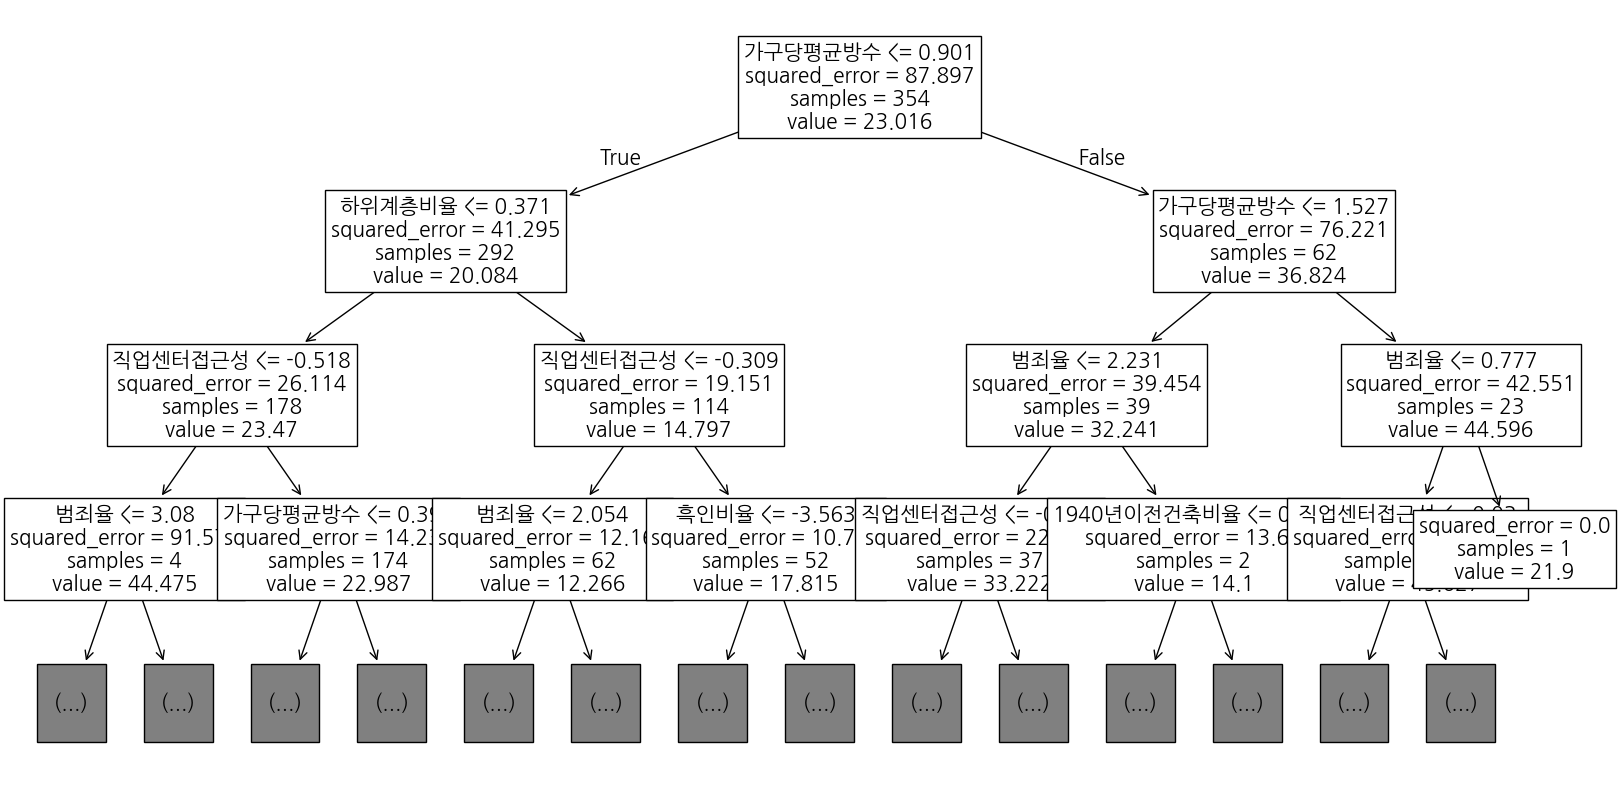

In [100]:
plt.figure(figsize=(20,10))
plot_tree(dtr, max_depth=3, feature_names=dtr.feature_names_in_, fontsize=15)

In [101]:
rfr = RandomForestRegressor(max_depth=3, n_estimators=100, n_jobs=4, random_state=42)
rfr.fit(rs_X_train, y_train)
pred = rfr.predict(rs_X_test)
rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
display(rfr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.019101
"25,000평방피트초과",0.000177
비소매상업지역비율,0.000667
찰스강경계,0.000490
농축 일산화질소,0.005174
가구당평균방수,0.471567
1940년이전건축비율,0.001456
직업센터접근성,0.059388
도로접근성,0.000989
재산세율,0.002586


MAE:  2.745342556730607
MSE:  14.333791913103536
RMSE:  3.7859994602619182
R2:  0.8076339225492488


In [103]:
for i in range(1, 11):
    rfr = RandomForestRegressor(max_depth=i, n_estimators=500, n_jobs=4, random_state=42)
    rfr.fit(rs_X_train, y_train)
    pred = rfr.predict(rs_X_test)
    rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
    print(i)
    display(rfr_result)
    print("MAE: ", mean_absolute_error(y_test, pred))
    print("MSE: ", mean_squared_error(y_test, pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2: ", r2_score(y_test, pred))
    print()

1


,0
범죄율,0.000
"25,000평방피트초과",0.000
비소매상업지역비율,0.000
찰스강경계,0.000
농축 일산화질소,0.000
가구당평균방수,0.546
1940년이전건축비율,0.000
직업센터접근성,0.000
도로접근성,0.000
재산세율,0.000


MAE:  3.854252712946796
MSE:  32.986625531701556
RMSE:  5.743398430520171
R2:  0.5573043197264954

2


,0
범죄율,0.001083
"25,000평방피트초과",0.000135
비소매상업지역비율,0.000000
찰스강경계,0.000000
농축 일산화질소,0.001869
가구당평균방수,0.463733
1940년이전건축비율,0.001018
직업센터접근성,0.005378
도로접근성,0.000000
재산세율,0.000147


MAE:  3.1579787851802337
MSE:  19.156324746479406
RMSE:  4.376793888964776
R2:  0.7429133147604678

3


,0
범죄율,0.019144
"25,000평방피트초과",0.000554
비소매상업지역비율,0.000449
찰스강경계,0.000575
농축 일산화질소,0.007224
가구당평균방수,0.429889
1940년이전건축비율,0.002637
직업센터접근성,0.053559
도로접근성,0.001357
재산세율,0.003384


MAE:  2.7003256050100584
MSE:  14.027993890530254
RMSE:  3.7453963596033804
R2:  0.8117378726031659

4


,0
범죄율,0.026088
"25,000평방피트초과",0.000775
비소매상업지역비율,0.002244
찰스강경계,0.001098
농축 일산화질소,0.010424
가구당평균방수,0.424845
1940년이전건축비율,0.005887
직업센터접근성,0.059208
도로접근성,0.002348
재산세율,0.006727


MAE:  2.4153431367431906
MSE:  11.880468014117916
RMSE:  3.446805479588008
R2:  0.8405586571920488

5


,0
범죄율,0.027454
"25,000평방피트초과",0.001003
비소매상업지역비율,0.003959
찰스강경계,0.001102
농축 일산화질소,0.011666
가구당평균방수,0.418894
1940년이전건축비율,0.009151
직업센터접근성,0.060439
도로접근성,0.003619
재산세율,0.008496


MAE:  2.257578849158933
MSE:  10.769672284798359
RMSE:  3.2817178862294605
R2:  0.8554660465690991

6


,0
범죄율,0.029661
"25,000평방피트초과",0.001240
비소매상업지역비율,0.004755
찰스강경계,0.001156
농축 일산화질소,0.012817
가구당평균방수,0.412902
1940년이전건축비율,0.011093
직업센터접근성,0.061241
도로접근성,0.004446
재산세율,0.010112


MAE:  2.1653286007967134
MSE:  10.17484149515075
RMSE:  3.1898027360874135
R2:  0.8634489492402925

7


,0
범죄율,0.030764
"25,000평방피트초과",0.001356
비소매상업지역비율,0.005522
찰스강경계,0.001271
농축 일산화질소,0.013987
가구당평균방수,0.409815
1940년이전건축비율,0.012024
직업센터접근성,0.062059
도로접근성,0.004555
재산세율,0.010697


MAE:  2.124439444410508
MSE:  9.770091766982704
RMSE:  3.1257146010124957
R2:  0.8688808766764489

8


,0
범죄율,0.031255
"25,000평방피트초과",0.001499
비소매상업지역비율,0.006270
찰스강경계,0.001351
농축 일산화질소,0.014056
가구당평균방수,0.407080
1940년이전건축비율,0.013012
직업센터접근성,0.062392
도로접근성,0.004440
재산세율,0.011296


MAE:  2.1118603173486257
MSE:  9.632078281881412
RMSE:  3.1035589702600164
R2:  0.8707330810983628

9


,0
범죄율,0.031669
"25,000평방피트초과",0.001484
비소매상업지역비율,0.006403
찰스강경계,0.001451
농축 일산화질소,0.014340
가구당평균방수,0.405731
1940년이전건축비율,0.013269
직업센터접근성,0.062451
도로접근성,0.004435
재산세율,0.011754


MAE:  2.091626505375224
MSE:  9.392717135941647
RMSE:  3.06475400904243
R2:  0.8739454177234296

10


,0
범죄율,0.031911
"25,000평방피트초과",0.001511
비소매상업지역비율,0.006619
찰스강경계,0.001307
농축 일산화질소,0.014919
가구당평균방수,0.404998
1940년이전건축비율,0.013785
직업센터접근성,0.062049
도로접근성,0.004882
재산세율,0.011812


MAE:  2.086255892212327
MSE:  9.477104647294093
RMSE:  3.078490644340842
R2:  0.8728128985238268



In [104]:
rfr = RandomForestRegressor(max_depth=9, n_estimators=500, n_jobs=4, random_state=42)
rfr.fit(rs_X_train, y_train)
pred = rfr.predict(rs_X_test)
rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
display(rfr_result)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

,0
범죄율,0.031669
"25,000평방피트초과",0.001484
비소매상업지역비율,0.006403
찰스강경계,0.001451
농축 일산화질소,0.014340
가구당평균방수,0.405731
1940년이전건축비율,0.013269
직업센터접근성,0.062451
도로접근성,0.004435
재산세율,0.011754


MAE:  2.0916265053752237
MSE:  9.392717135941648
RMSE:  3.06475400904243
R2:  0.8739454177234296
